In [128]:
import imageio
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def divide_gif_frames(gif_files, frames_between, first_frame, last_frame, output_path=None):
    # Calculate the number of GIFs
    num_gifs = len(gif_files)
    num_frames = min(max([len(imageio.mimread(gif_file)) for gif_file in gif_files.values()]), last_frame - first_frame + 1)
    num_cells = num_frames // frames_between
    remainder_frames = num_frames % frames_between
    
    # Create the figure and axes
    fig, axes = plt.subplots(2 * num_gifs, num_cells + (2 if remainder_frames > 0 else 1), figsize=(2 * num_cells, 4 * num_gifs))

    # Adjust the spacing between the subplots
    plt.subplots_adjust(hspace=0.05, wspace=0.05)

    # Iterate over the GIFs and generate the frames
    for i, (model_name, gif_file) in enumerate(gif_files.items()):
        # Read the GIF file
        gif = imageio.mimread(gif_file)
        # Adjust the range of frames
        gif = gif[first_frame:last_frame + 1]
        
        # Calculate the row indices
        row_idx_1 = 2 * i
        row_idx_2 = 2 * i + 1

        n_cells_filled = 0
        
        # Iterate over the frames and divide them into halves
        for j, frame in enumerate(gif):
            # Divide the frame into two halves
            mid = frame.shape[1] // 2
            policy_image = frame[:, :mid, :]
            policy_goal = frame[:, mid:, :]
            
            # Calculate the grid cell index
            cell_idx = (j // frames_between) + 1

            # Plot the divided frames in the corresponding axes
            axes[row_idx_1, cell_idx].imshow(policy_image)
            axes[row_idx_2, cell_idx].imshow(policy_goal)
            
            # Remove the axis labels and ticks
            axes[row_idx_1, cell_idx].axis("off")
            axes[row_idx_2, cell_idx].axis("off")
        
            # Set the same aspect ratio for all images
            axes[row_idx_1, cell_idx].set_aspect('equal')
            axes[row_idx_2, cell_idx].set_aspect('equal')
            
            # Print timestep at the bottom of the second row for each cell
            if row_idx_2 == 2 * num_gifs - 1 or (row_idx_2 + 1) // 2 != (row_idx_2 + 2) // 2:
                timestep = first_frame + frames_between * (cell_idx - 1)
                axes[row_idx_2, cell_idx].text(0.5, -0.3, f"T={timestep}", fontsize=14, ha='center', va="bottom", transform=axes[row_idx_2, cell_idx].transAxes, family='sans-serif')
            
            n_cells_filled += 1
            
        if n_cells_filled < num_cells:
            for i in range(n_cells_filled, num_cells + 1):
                # Remove the axis labels and ticks
                axes[row_idx_1, i].axis("off")
                axes[row_idx_2, i].axis("off")
            
                # Set the same aspect ratio for all images
                axes[row_idx_1, i].set_aspect('equal')
                axes[row_idx_2, i].set_aspect('equal')

        # Add label to the 0th column
        axes[row_idx_1, 0].axis("off")
        axes[row_idx_2, 0].axis("off")
        axes[row_idx_1, 0].set_aspect(2.0)
        axes[row_idx_2, 0].set_aspect(2.0)
        axes[row_idx_1, 0].text(0.5, 0.5, f"{model_name}\nEpisode", rotation=90, fontsize=12, ha="center", va="center")
        axes[row_idx_2, 0].text(0.5, 0.5, f"{model_name}\nGoal", rotation=90, fontsize=12, ha="center", va="center")
    
    # Show the grid of frames
    plt.show()
    
    if output_path is not None:
        # Save the figure
        fig.savefig(output_path, bbox_inches='tight')

# DM Control Suite - Pendulum Visualisation

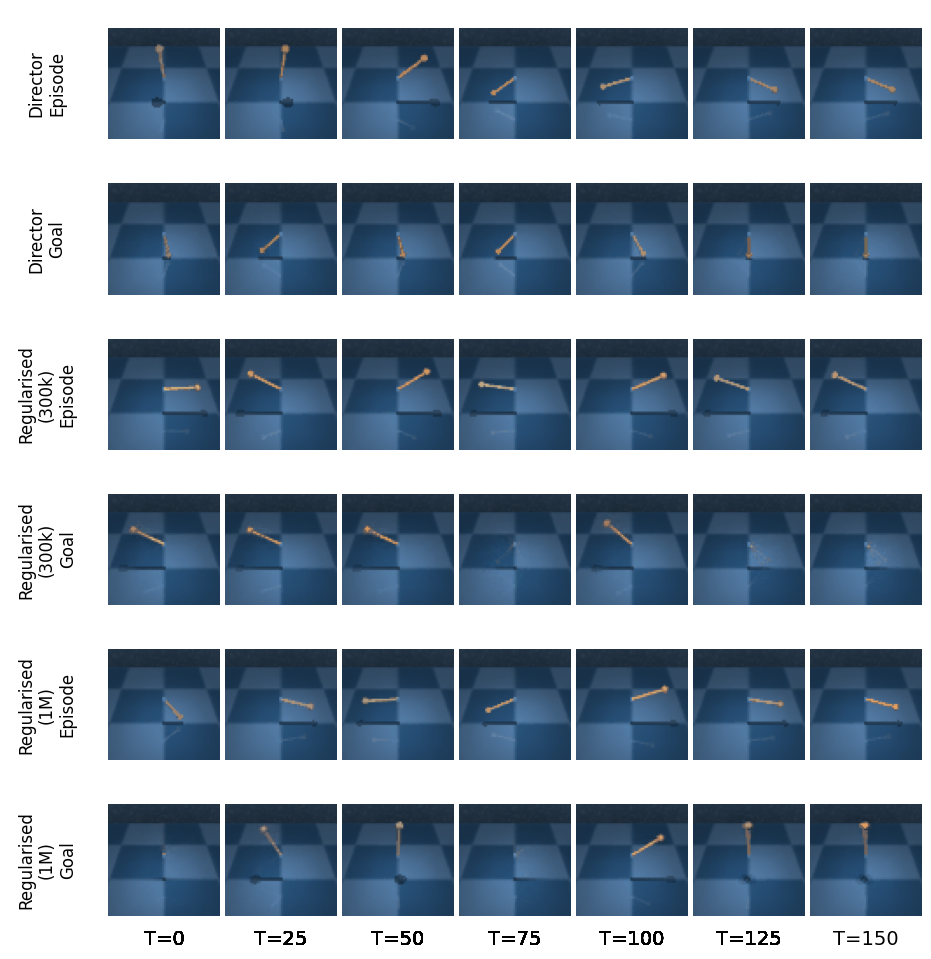

In [134]:
images_path = "../data/pendulum"

gif_files = {
    "Director": "director.gif",
    "Regularised\n(300k)": "regularised_300k.gif",
    "Regularised\n(1M)": "regularised.gif",
}

for model_name, gif_file in gif_files.items():
    gif_files[model_name] = os.path.join(images_path, gif_file)

frames_between = 25
first_frame = 0
last_frame = 150
output_path = os.path.join(images_path, "pendulum_viz.png")

divide_gif_frames(gif_files, frames_between, first_frame, last_frame, output_path=output_path)

# MiniGrid - Empty Room Visualisation

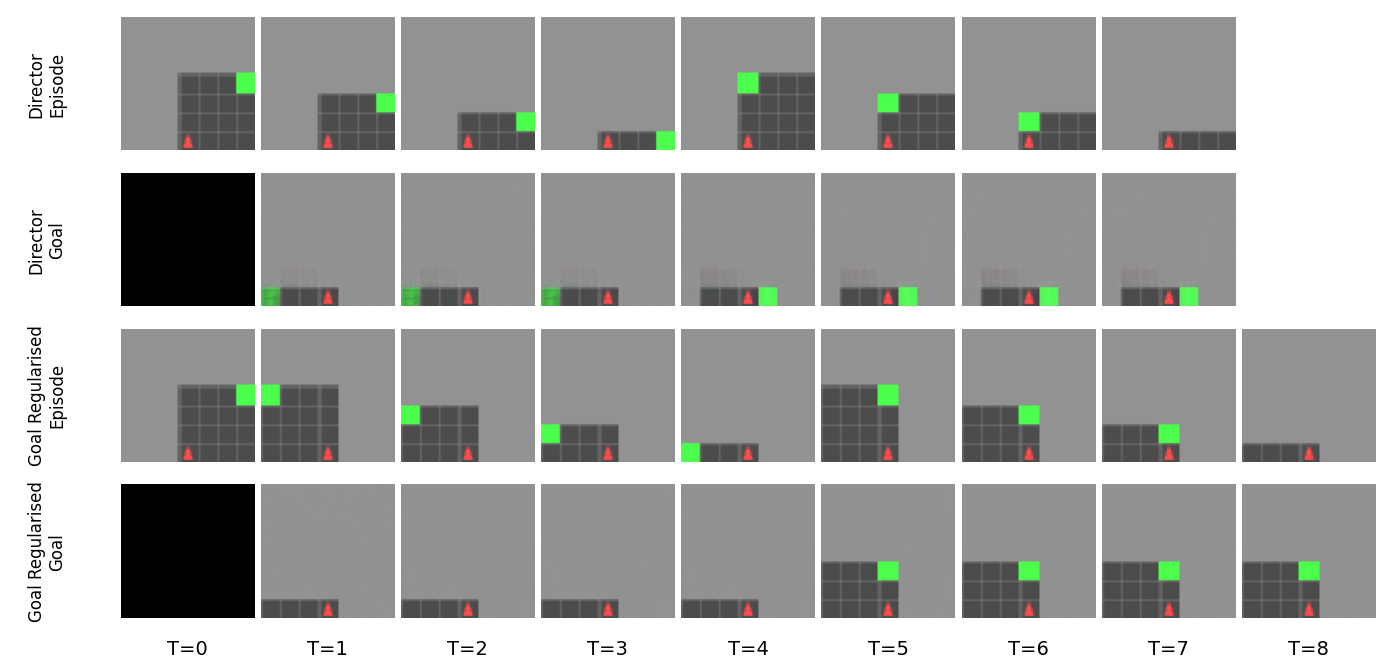

In [132]:
images_path = "../data/emptyroom"

gif_files = {
    "Director": "director.gif",
    "Goal Regularised": "alpha1.0.gif",
}

for model_name, gif_file in gif_files.items():
    gif_files[model_name] = os.path.join(images_path, gif_file)

frames_between = 1
first_frame = 0
last_frame = 8
output_path = os.path.join(images_path, "emptyroom_viz.png")

divide_gif_frames(gif_files, frames_between, first_frame, last_frame, output_path=output_path)

# MiniGrid Door-Key Visualisation

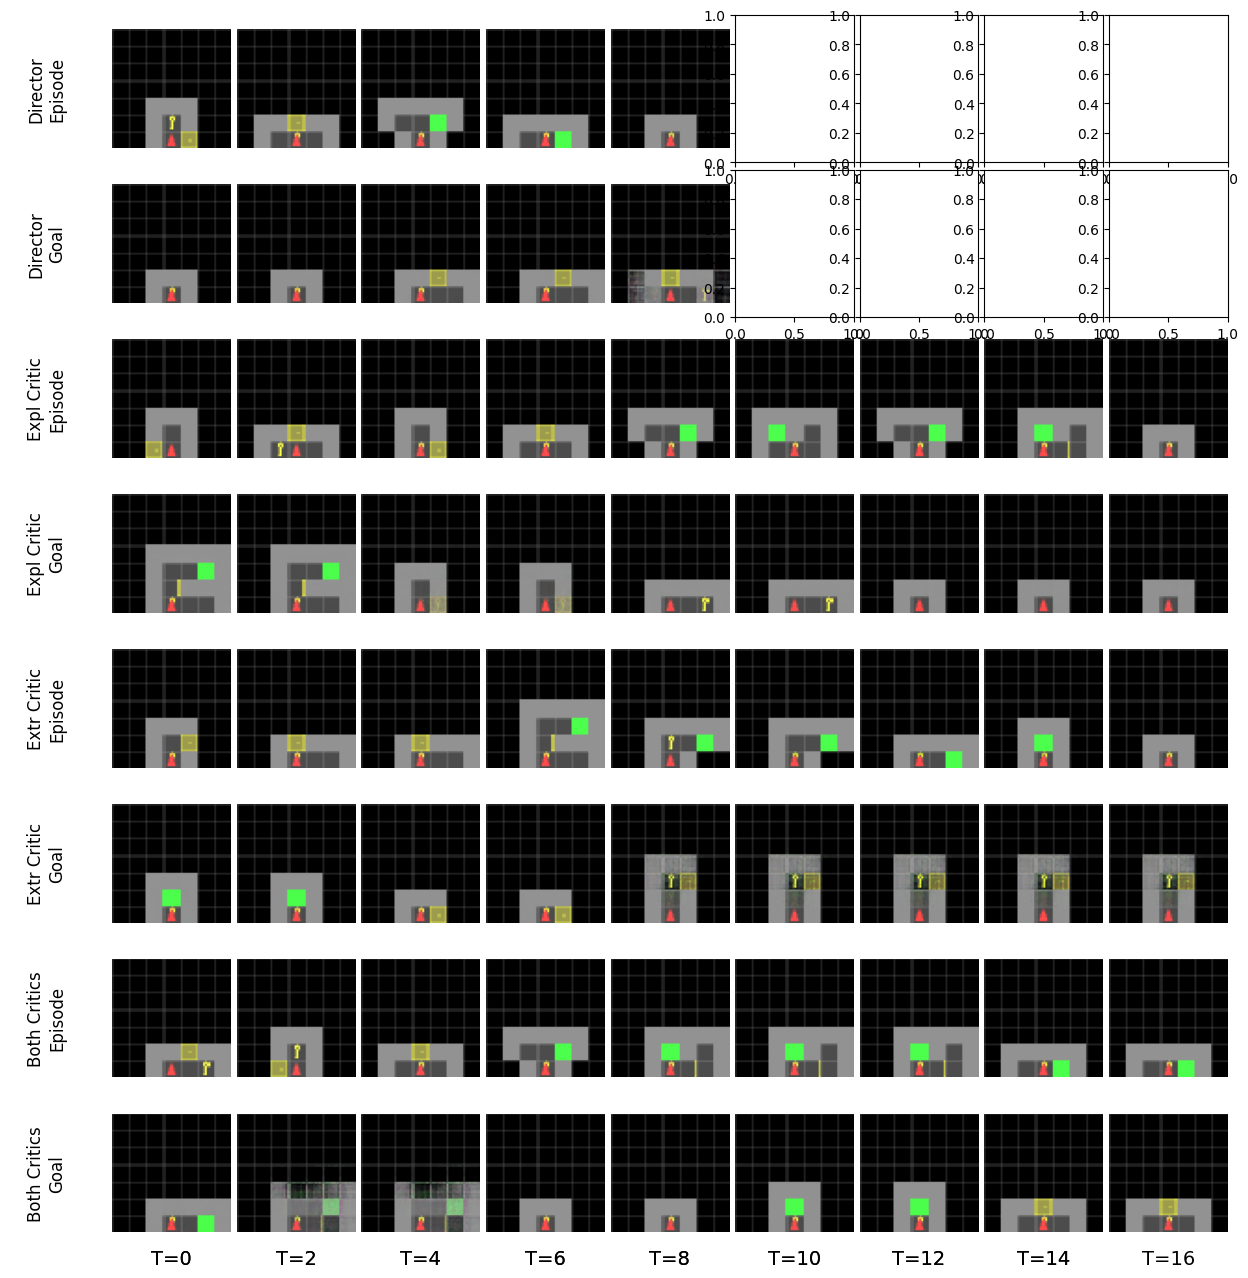

In [131]:
images_path = "../data/doorkey"

gif_files = {
    "Director": "director.gif",
    "Expl Critic": "expl_critic.gif",
    "Extr Critic": "extr_critic.gif",
    "Both Critics": "both_critics.gif",
}

for model_name, gif_file in gif_files.items():
    gif_files[model_name] = os.path.join(images_path, gif_file)

frames_between = 2
first_frame = 0
last_frame = 16
output_path = os.path.join(images_path, "emptyroom_viz.png")

divide_gif_frames(gif_files, frames_between, first_frame, last_frame, output_path=output_path)